## 📍 Section A: Initial Exploration and Cleaning

### 1. Load and Inspect:

In [1]:
import pandas as pd

##### Load 2015.csv, 2016.csv, 2021.csv into separate DataFrames.

In [2]:
df_2015 = pd.read_csv('./dataset/world_happiness_report/2015.csv')
df_2016 = pd.read_csv('./dataset/world_happiness_report/2016.csv')
df_2021 = pd.read_csv('./dataset/world_happiness_report/2021.csv')

In [3]:
df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2021['year'] = '2021'

In [4]:
df_2021['Ladder score']

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

##### Print .shape, .columns, and .info() for each.

In [5]:
df_2015.shape,df_2016.shape,df_2021.shape,

((158, 13), (157, 14), (149, 21))

In [6]:
df_2015.columns,df_2016.columns,df_2021.columns

(Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Standard Error', 'Economy (GDP per Capita)', 'Family',
        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual', 'year'],
       dtype='object'),
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Lower Confidence Interval', 'Upper Confidence Interval',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity',
        'Dystopia Residual', 'year'],
       dtype='object'),
 Index(['Country name', 'Regional indicator', 'Ladder score',
        'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'Ladder score in Dystopia',
        'Explained by: Log GDP per capita', 'Ex

In [7]:
df_2015.info(),df_2016.info(),df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  year                           158 non-null    obj

(None, None, None)

###### Identify key columns: Country, Happiness Score, GDP per capita, etc.

We need to find common columns in three dataset : [df_2015, df_2016, df_2021]

| 2015.csv , 2016.csv             | 2021.csv                       | Standardized Name |
| ------------------------------- | ------------------------------ | ----------------- |
| `Country`                       | `Country name`                 | `country`         |
| `Happiness Score`               | `Ladder score`                 | `happiness_score` |
| `Economy (GDP per Capita)`      | `Logged GDP per capita`        | `gdp_per_capita`  |
| `Health (Life Expectancy)`      | `Healthy life expectancy`      | `life_expectancy` |
| `Freedom`                       | `Freedom to make life choices` | `freedom`         |
| `Trust (Government Corruption)` | `Perceptions of corruption`    | `corruption`      |
| `Family`                        | `Social support`               | `social_support`  |
| `Generosity`                    | `Generosity`                   | `generosity`      |


### 2. **Standardize Columns**:
##### - Rename columns to consistent names across years (e.g., `Happiness.Score` → `Happiness Score`).

In [8]:
column_map_2015 = {
    'Country':'country',
    'Happiness Score':'happiness_score',
    'Economy (GDP per Capita)' : 'gdp_per_capita',
    'Health (Life Expectancy)' : 'life_expectancy',
    'Freedom' : 'freedom',
    'Trust (Government Corruption)' : 'corruption',
    'Family' : 'social_support',
    'Generosity': 'generosity',
    'Region':'region'
}

In [9]:
column_map_2016 = {
    'Country':'country',
    'Happiness Score':'happiness_score',
    'Economy (GDP per Capita)' : 'gdp_per_capita',
    'Health (Life Expectancy)' : 'life_expectancy',
    'Freedom' : 'freedom',
    'Trust (Government Corruption)' : 'corruption',
    'Family' : 'social_support',
    'Generosity': 'generosity',
    'Region':'region'
}

In [10]:
column_map_2021 = {
'Country name':'country',
'Ladder score':'happiness_score',
'Logged GDP per capita':'gdp_per_capita',
'Healthy life expectancy':'life_expectancy',
'Freedom to make life choices':'freedom',
'Perceptions of corruption':'corruption',
'Social support':'social_support',
'Generosity':'generosity',
'Regional indicator':'region'
}

In [11]:
df_2015 = df_2015.rename(columns = column_map_2015)
df_2016 = df_2016.rename(columns = column_map_2016)
df_2021 = df_2021.rename(columns = column_map_2021)

##### Drop columns not common across at least 3 years.

In [12]:
columns_to_keep = ['country','happiness_score','gdp_per_capita','life_expectancy','freedom','corruption','social_support','generosity','region','year']

df_2015 = df_2015.loc[:,df_2015.columns.intersection(columns_to_keep)]
df_2016 = df_2016.loc[:,df_2016.columns.intersection(columns_to_keep)]
df_2021 = df_2021.loc[:,df_2021.columns.intersection(columns_to_keep)]

In [13]:
df_2016.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'life_expectancy', 'freedom', 'corruption',
       'generosity', 'year'],
      dtype='object')

### 3. Handle Missing Data:

##### Check for missing values in each DataFrame.

In [14]:
df_2015.isnull().sum()

country            0
region             0
happiness_score    0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
corruption         0
generosity         0
year               0
dtype: int64

In [15]:
df_2016.isnull().sum()

country            0
region             0
happiness_score    0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
corruption         0
generosity         0
year               0
dtype: int64

In [16]:
df_2021.isnull().sum()

country            0
region             0
happiness_score    0
gdp_per_capita     0
social_support     0
life_expectancy    0
freedom            0
generosity         0
corruption         0
year               0
dtype: int64

## 🔗 Section B: Combining and Merging

### 1. **Add Year Column**:
##### - For each DataFrame (`df_2015`, `df_2016`, `df_2021`), add a new column `year` with the respective year as a value.

In [17]:
df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2021['year'] = '2021'

### 2. **Concatenate All**:
##### - Concatenate all DataFrames (from 2015 to 2022) into one `df_all`.

In [18]:
df_all = pd.concat([df_2015,df_2016,df_2021],axis=0)

In [19]:
df_all

,country,region,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.92600,0.78700,48.70000,0.71500,0.91500,-0.13100,2021
145,Botswana,Sub-Saharan Africa,3.467,9.78200,0.78400,59.26900,0.82400,0.80100,-0.24600,2021
146,Rwanda,Sub-Saharan Africa,3.415,7.67600,0.55200,61.40000,0.89700,0.16700,0.06100,2021
147,Zimbabwe,Sub-Saharan Africa,3.145,7.94300,0.75000,56.20100,0.67700,0.82100,-0.04700,2021


##### - Set a multi-index of `country` and `year`.

In [20]:
df_all.set_index(['country','year'],inplace=True)

In [21]:
df_all.index

MultiIndex([('Switzerland', '2015'),
            (    'Iceland', '2015'),
            (    'Denmark', '2015'),
            (     'Norway', '2015'),
            (     'Canada', '2015'),
            (    'Finland', '2015'),
            ('Netherlands', '2015'),
            (     'Sweden', '2015'),
            ('New Zealand', '2015'),
            (  'Australia', '2015'),
            ...
            (    'Burundi', '2021'),
            (      'Yemen', '2021'),
            (   'Tanzania', '2021'),
            (      'Haiti', '2021'),
            (     'Malawi', '2021'),
            (    'Lesotho', '2021'),
            (   'Botswana', '2021'),
            (     'Rwanda', '2021'),
            (   'Zimbabwe', '2021'),
            ('Afghanistan', '2021')],
           names=['country', 'year'], length=464)

### 3. **Country Name Consistency**:
##### - Use `.nunique()` and `.value_counts()` to identify country name discrepancies across years (e.g., "United States" vs. "United States of America").

In [22]:
countries = df_all.index.get_level_values('country').unique()

In [23]:
for country in countries:
    print(country)

Switzerland
Iceland
Denmark
Norway
Canada
Finland
Netherlands
Sweden
New Zealand
Australia
Israel
Costa Rica
Austria
Mexico
United States
Brazil
Luxembourg
Ireland
Belgium
United Arab Emirates
United Kingdom
Oman
Venezuela
Singapore
Panama
Germany
Chile
Qatar
France
Argentina
Czech Republic
Uruguay
Colombia
Thailand
Saudi Arabia
Spain
Malta
Taiwan
Kuwait
Suriname
Trinidad and Tobago
El Salvador
Guatemala
Uzbekistan
Slovakia
Japan
South Korea
Ecuador
Bahrain
Italy
Bolivia
Moldova
Paraguay
Kazakhstan
Slovenia
Lithuania
Nicaragua
Peru
Belarus
Poland
Malaysia
Croatia
Libya
Russia
Jamaica
North Cyprus
Cyprus
Algeria
Kosovo
Turkmenistan
Mauritius
Hong Kong
Estonia
Indonesia
Vietnam
Turkey
Kyrgyzstan
Nigeria
Bhutan
Azerbaijan
Pakistan
Jordan
Montenegro
China
Zambia
Romania
Serbia
Portugal
Latvia
Philippines
Somaliland region
Morocco
Macedonia
Mozambique
Albania
Bosnia and Herzegovina
Lesotho
Dominican Republic
Laos
Mongolia
Swaziland
Greece
Lebanon
Hungary
Honduras
Tajikistan
Tunisia
Palestin

## 📊 Section C: Analysis Across Years

### 1. **Pivot Happiness Score**:
#####    - Create a pivot table with `country` as index and years as columns, with values as `happiness_score`.

In [24]:
df_pivot_happiness_score = df_all.pivot_table(index='country',columns='year',values='happiness_score')

In [25]:
df_pivot_happiness_score

year,2015,2016,2021
country,,,
Afghanistan,3.575,3.360,2.523
Albania,4.959,4.655,5.117
Algeria,5.605,6.355,4.887
Angola,4.033,3.866,NaN
Argentina,6.574,6.650,5.929
...,...,...,...
Venezuela,6.810,6.084,4.892
Vietnam,5.360,5.061,5.411
Yemen,4.077,3.724,3.658


##### Which countries showed the biggest increase and biggest decrease from 2015 to 2021?

In [26]:
df_pivot_happiness_score.columns

Index(['2015', '2016', '2021'], dtype='object', name='year')

In [27]:
df_pivot_happiness_score[df_pivot_happiness_score['2015'] < df_pivot_happiness_score['2021']]

year,2015,2016,2021
country,,,
Albania,4.959,4.655,5.117
Armenia,4.350,4.360,5.283
Austria,7.200,7.119,7.268
Bahrain,5.960,6.218,6.647
Bangladesh,4.694,4.643,5.025
...,...,...,...
Uganda,3.931,3.739,4.636
Ukraine,4.681,4.324,4.875
United Kingdom,6.867,6.725,7.064


In [28]:
df_pivot_happiness_score['change_2015_2021'] = df_pivot_happiness_score['2021'] - df_pivot_happiness_score['2015']

In [29]:
df_pivot_happiness_score[df_pivot_happiness_score['change_2015_2021'] > 0.0].index.to_list()

['Albania',
 'Armenia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Benin',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Chad',
 'China',
 'Comoros',
 'Congo (Brazzaville)',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Ireland',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Mali',
 'Malta',
 'Mauritius',
 'Mongolia',
 'Montenegro',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'Nicaragua',
 'Niger',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Tajikistan',
 'Togo',
 'Uganda',
 'Ukraine',
 'United Kingdom'

In [30]:
countries_with_decreasing_happiness = df_pivot_happiness_score[df_pivot_happiness_score['change_2015_2021'] < 0.0].index.to_list()

In [31]:
df_pivot_happiness_score

year,2015,2016,2021,change_2015_2021
country,,,,
Afghanistan,3.575,3.360,2.523,-1.052
Albania,4.959,4.655,5.117,0.158
Algeria,5.605,6.355,4.887,-0.718
Angola,4.033,3.866,NaN,NaN
Argentina,6.574,6.650,5.929,-0.645
...,...,...,...,...
Venezuela,6.810,6.084,4.892,-1.918
Vietnam,5.360,5.061,5.411,0.051
Yemen,4.077,3.724,3.658,-0.419


### 2. **Compare GDP vs Happiness**:
#####    - Identify countries where `gdp_per_capita` increased but `happiness_score` decreased between 2015 and 2021.

In [32]:
df_pivot_gdp = df_all.pivot_table(index='country',columns='year',values='gdp_per_capita')

In [33]:
df_pivot_gdp

year,2015,2016,2021
country,,,
Afghanistan,0.31982,0.38227,7.695
Albania,0.87867,0.95530,9.520
Algeria,0.93929,1.05266,9.342
Angola,0.75778,0.84731,NaN
Argentina,1.05351,1.15137,9.962
...,...,...,...
Venezuela,1.04424,1.13367,9.073
Vietnam,0.63216,0.74037,8.973
Yemen,0.54649,0.57939,7.578


In [34]:
countries_with_increasing_gdp = df_pivot_gdp[df_pivot_gdp['2021'] - df_pivot_gdp['2015'] > 0.0].index.to_list()

Countries with increasing gdp and decreasing happiness score

In [35]:
target_countries = list(set(countries_with_decreasing_happiness) & set(countries_with_increasing_gdp))

In [36]:
target_countries

['Tunisia',
 'Argentina',
 'Belgium',
 'Kuwait',
 'Jordan',
 'Rwanda',
 'Indonesia',
 'Uruguay',
 'Morocco',
 'Sierra Leone',
 'Turkmenistan',
 'Malaysia',
 'Panama',
 'Azerbaijan',
 'Malawi',
 'Moldova',
 'Canada',
 'Lebanon',
 'Bolivia',
 'Swaziland',
 'Chile',
 'El Salvador',
 'Pakistan',
 'Sweden',
 'Colombia',
 'Zimbabwe',
 'Tanzania',
 'Venezuela',
 'Costa Rica',
 'Russia',
 'Libya',
 'Paraguay',
 'Belarus',
 'South Korea',
 'Australia',
 'Haiti',
 'Mozambique',
 'Palestinian Territories',
 'Israel',
 'New Zealand',
 'Thailand',
 'Ecuador',
 'United Arab Emirates',
 'Mauritania',
 'North Cyprus',
 'Mexico',
 'Lesotho',
 'Singapore',
 'United States',
 'Ethiopia',
 'Turkey',
 'Brazil',
 'Algeria',
 'Yemen',
 'Afghanistan',
 'India',
 'Iceland',
 'Norway',
 'Switzerland',
 'Zambia',
 'Botswana',
 'Nigeria',
 'Japan']

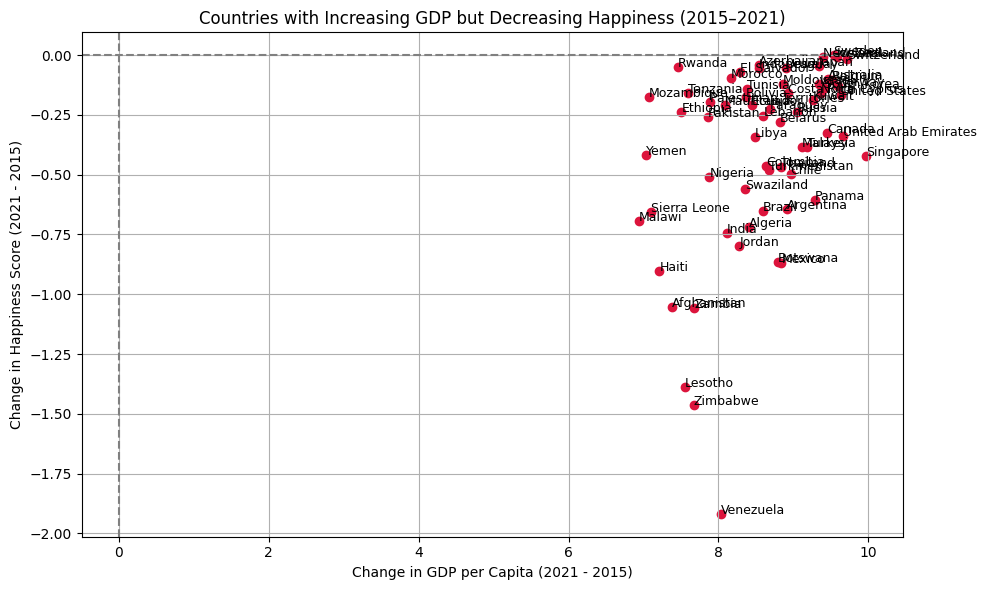

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create pivot tables (as you did)
df_pivot_gdp = df_all.pivot_table(index='country', columns='year', values='gdp_per_capita')
df_pivot_happiness_score = df_all.pivot_table(index='country', columns='year', values='happiness_score')

# Step 2: Compute GDP increase
countries_with_increasing_gdp = df_pivot_gdp[df_pivot_gdp['2021'] - df_pivot_gdp['2015'] > 0.0].index.to_list()

# Step 3: Compute change in happiness score
df_pivot_happiness_score['change_2015_2021'] = df_pivot_happiness_score['2021'] - df_pivot_happiness_score['2015']

# Step 4: Get countries with decreasing happiness
countries_with_decreasing_happiness = df_pivot_happiness_score[df_pivot_happiness_score['change_2015_2021'] < 0.0].index.to_list()

# Step 5: Intersection of both
target_countries = list(set(countries_with_increasing_gdp) & set(countries_with_decreasing_happiness))

# Step 6: Create data for scatter plot
gdp_change = df_pivot_gdp.loc[target_countries, '2021'] - df_pivot_gdp.loc[target_countries, '2015']
happiness_change = df_pivot_happiness_score.loc[target_countries, '2021'] - df_pivot_happiness_score.loc[target_countries, '2015']

df_scatter = pd.DataFrame({
    'country': target_countries,
    'gdp_change': gdp_change.values,
    'happiness_change': happiness_change.values
})

# Step 7: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['gdp_change'], df_scatter['happiness_change'], color='crimson')

# Annotate country names
for _, row in df_scatter.iterrows():
    plt.text(row['gdp_change'], row['happiness_change'], row['country'], fontsize=9)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Countries with Increasing GDP but Decreasing Happiness (2015–2021)')
plt.xlabel('Change in GDP per Capita (2021 - 2015)')
plt.ylabel('Change in Happiness Score (2021 - 2015)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📈 Section D: Regional & Global Trends

### 1. **Group by Region**:
#####    - Use the `region` column (available in older years like 2015–2016). 

In [38]:
df_all.groupby('region')['gdp_per_capita'].mean()

region
Australia and New Zealand              1.347212
Central and Eastern Europe             3.060844
Commonwealth of Independent States     9.401833
East Asia                             10.367667
Eastern Asia                           1.214546
Latin America and Caribbean            3.492906
Middle East and North Africa           9.666118
Middle East and Northern Africa        1.102221
North America                          1.417228
North America and ANZ                 10.809500
South Asia                             8.682571
Southeast Asia                         9.421444
Southeastern Asia                      0.842718
Southern Asia                          0.610579
Sub-Saharan Africa                     2.841668
Western Europe                         4.512789
Name: gdp_per_capita, dtype: float64

##### Group by region and year, calculate average happiness_score.

In [39]:
region_year_happiness = df_all.groupby(['region','year'])['happiness_score'].mean().unstack().T

In [40]:
region_year_happiness

region,Australia and New Zealand,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Eastern Asia,Latin America and Caribbean,Middle East and North Africa,Middle East and Northern Africa,North America,North America and ANZ,South Asia,Southeast Asia,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,,,,,
2015,7.2850,5.332931,NaN,NaN,5.626167,6.144682,NaN,5.406900,7.273,NaN,NaN,NaN,5.317444,4.580857,4.202800,6.689619
2016,7.3235,5.370690,NaN,NaN,5.624167,6.101750,NaN,5.386053,7.254,NaN,NaN,NaN,5.338889,4.563286,4.136421,6.685667
2021,NaN,5.984765,5.467,5.810333,NaN,5.908050,5.219765,NaN,NaN,7.1285,4.441857,5.407556,NaN,NaN,4.494472,6.914905


### 2. **Line Plot: Regional Trends**:
##### - Plot average `happiness_score` over time for each region.

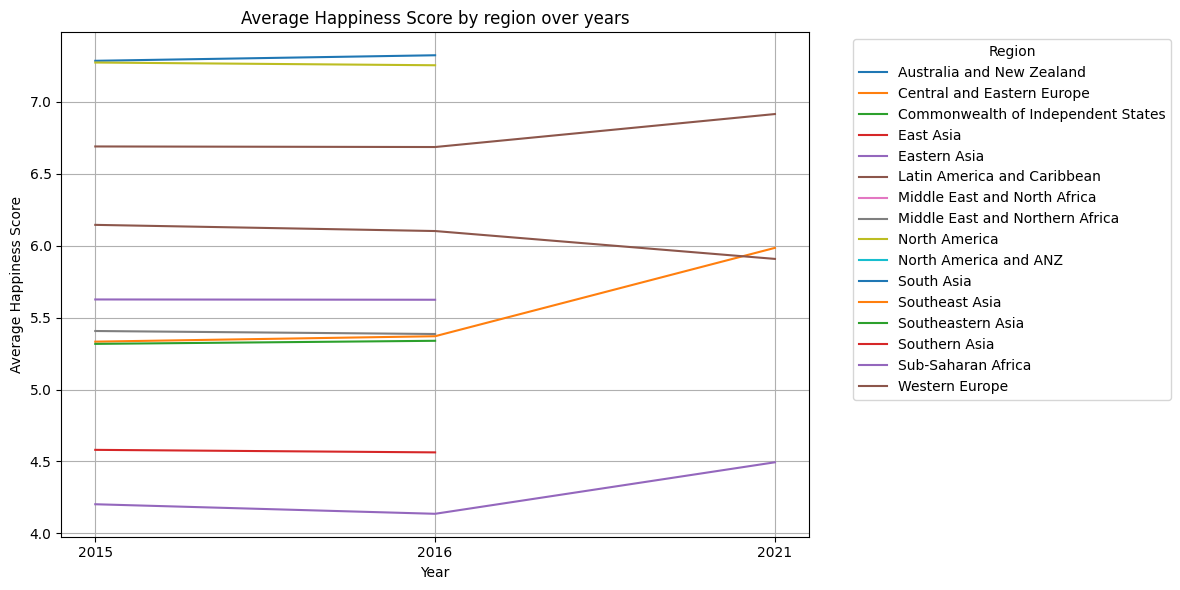

In [41]:
plt.figure(figsize=(12,6))
for region in region_year_happiness.columns:
    plt.plot(region_year_happiness.index,region_year_happiness[region],label=region)

plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by region over years')
plt.legend(title='Region',bbox_to_anchor=(1.05,1),loc = 'upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### 3. **Top and Bottom Performers**:
##### - For each year:
    - List top 5 happiest and bottom 5 happiest countries.

In [42]:
df_all.reset_index(inplace=True)

In [43]:
unique_years = df_all['year'].unique()

In [44]:
from collections import Counter

top_counts = Counter()
bottom_counts = Counter()

for year in unique_years:
    print(f"========================================{year}==================================")
    print("========================================Top 5==================================")
    top_countries = df_all[df_all['year'] == year].sort_values(by='happiness_score',ascending=False).head(5)['country']
    top_counts.update(top_countries)
    
    print(top_countries)
    print("========================================Bottom 5==================================")
    bottom_countries = df_all[df_all['year'] == year].sort_values(by='happiness_score',ascending=False).tail(5)['country']
    print(bottom_countries)
    bottom_counts.update(bottom_countries)

========================================2015==================================
========================================Top 5==================================
0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
Name: country, dtype: object
========================================Bottom 5==================================
153     Rwanda
154      Benin
155      Syria
156    Burundi
157       Togo
Name: country, dtype: object
========================================2016==================================
========================================Top 5==================================
158        Denmark
159    Switzerland
160        Iceland
161         Norway
162        Finland
Name: country, dtype: object
========================================Bottom 5==================================
310          Benin
311    Afghanistan
312           Togo
313          Syria
314        Burundi
Name: country, dtype: object
========================================2021======

##### Are there any countries that consistently appear in the top or bottom 5?

In [45]:
top_counts

Counter({'Switzerland': 3,
         'Iceland': 3,
         'Denmark': 3,
         'Norway': 2,
         'Finland': 2,
         'Canada': 1,
         'Netherlands': 1})

In [46]:
bottom_counts

Counter({'Rwanda': 2,
         'Benin': 2,
         'Syria': 2,
         'Burundi': 2,
         'Togo': 2,
         'Afghanistan': 2,
         'Lesotho': 1,
         'Botswana': 1,
         'Zimbabwe': 1})

## 🧪 Section E: Advanced Tasks

### 1. **Handling Indicator Differences**:
##### - `2021.csv` and `2022.csv` include `Healthy life expectancy`, `Freedom to make life choices`, etc.
Merge these files carefully with earlier years and fill NaN values with np.nan.

In [47]:
df_2022 = pd.read_csv('./dataset/world_happiness_report/2022.csv')

In [48]:
df_2022.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [49]:
df_2021.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'life_expectancy', 'freedom', 'generosity',
       'corruption', 'year'],
      dtype='object')

In [50]:
df_2022_column_map = {
    'Country' : 'country',
    'Happiness score': 'happines_score',
    'Explained by: GDP per capita':'gdp_per_capita',
    'Explained by: Social support':'social_support',
    'Explained by: Healthy life expectancy':'life_expectancy',
    'Explained by: Freedom to make life choices':'freedom',
    'Explained by: Generosity':'generosity',
    'Explained by: Perceptions of corruption':'corruption'
}

In [51]:
df_2022 = df_2022.rename(columns=df_2022_column_map)

In [52]:
df_2022.columns

Index(['RANK', 'country', 'happines_score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'gdp_per_capita', 'social_support',
       'life_expectancy', 'freedom', 'generosity', 'corruption'],
      dtype='object')

In [53]:
df_2022.head(10)

,RANK,country,happines_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [54]:
country_region_dict = df_all.set_index('country')['region'].to_dict()

In [55]:
df_2022['region'] = df_2022['country'].map(country_region_dict)

In [56]:
df_2022['year'] = '2022'

In [57]:
df_2022.isnull().sum()

RANK                           0
country                        0
happines_score                 1
Whisker-high                   1
Whisker-low                    1
Dystopia (1.83) + residual     1
gdp_per_capita                 1
social_support                 1
life_expectancy                1
freedom                        1
generosity                     1
corruption                     1
region                        24
year                           0
dtype: int64

In [58]:
df_2022[df_2022['happines_score'].isnull()]

,RANK,country,happines_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,region,year
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [59]:
df_2022.dropna(inplace=True)

In [60]:
df_2022 = df_2022.loc[:,df_2022.columns.intersection(columns_to_keep)]

In [61]:
df_2022

,country,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,region,year
0,Finland,"1,892","1,258","0,775","0,736","0,109","0,534",Western Europe,2022
1,Denmark,"1,953","1,243","0,777","0,719","0,188","0,532",Western Europe,2022
2,Iceland,"1,936","1,320","0,803","0,718","0,270","0,191",Western Europe,2022
3,Switzerland,"2,026","1,226","0,822","0,677","0,147","0,461",Western Europe,2022
4,Netherlands,"1,945","1,206","0,787","0,651","0,271","0,419",Western Europe,2022
...,...,...,...,...,...,...,...,...,...
138,Tanzania,"0,848","0,597","0,425","0,578","0,248","0,270",Sub-Saharan Africa,2022
139,Sierra Leone,"0,686","0,416","0,273","0,387","0,202","0,055",Sub-Saharan Africa,2022
143,Zimbabwe,"0,947","0,690","0,270","0,329","0,106","0,105",Sub-Saharan Africa,2022
144,Lebanon,"1,392","0,498","0,631","0,103","0,082","0,034",Middle East and North Africa,2022


In [62]:
df_all = pd.concat([df_all,df_2022],axis=0)

In [63]:
df_all

,country,year,region,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity
0,Switzerland,2015,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363
2,Denmark,2015,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,2015,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,2015,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
138,Tanzania,2022,Sub-Saharan Africa,NaN,"0,848","0,597","0,425","0,578","0,270","0,248"
139,Sierra Leone,2022,Sub-Saharan Africa,NaN,"0,686","0,416","0,273","0,387","0,055","0,202"
143,Zimbabwe,2022,Sub-Saharan Africa,NaN,"0,947","0,690","0,270","0,329","0,105","0,106"
144,Lebanon,2022,Middle East and North Africa,NaN,"1,392","0,498","0,631","0,103","0,034","0,082"


### 1. **Melting and Reshaping**:
##### - Melt `df_all` so that each row contains: `country`, `year`, `indicator`, and `value`.

In [64]:
df_melted = pd.melt(df_all,
                    id_vars=['country','year'],
                    var_name='indicator',
                    value_name='value'
                   )

In [65]:
df_melted

,country,year,indicator,value
0,Switzerland,2015,region,Western Europe
1,Iceland,2015,region,Western Europe
2,Denmark,2015,region,Western Europe
3,Norway,2015,region,Western Europe
4,Canada,2015,region,North America
...,...,...,...,...
4691,Tanzania,2022,generosity,"0,248"
4692,Sierra Leone,2022,generosity,"0,202"
4693,Zimbabwe,2022,generosity,"0,106"
4694,Lebanon,2022,generosity,"0,082"


## 🌍 Bonus Explorations

### 1. **Generosity vs. Happiness**:
##### - Across all years, analyze correlation between `generosity` and `happiness_score`.

In [66]:
df_all['generosity'].dtype

dtype('O')

In [67]:
df_all['generosity'] = pd.to_numeric(df_all['generosity'],errors='coerce')

In [68]:
df_all[['generosity','happiness_score']].corr()

,generosity,happiness_score
generosity,1.000000,0.036592
happiness_score,0.036592,1.000000


In [69]:
corr_matrix = df_all.groupby('region')[['generosity','happiness_score']].corr()

In [70]:
gen_happy_corr = corr_matrix.xs('generosity',level=1)['happiness_score']

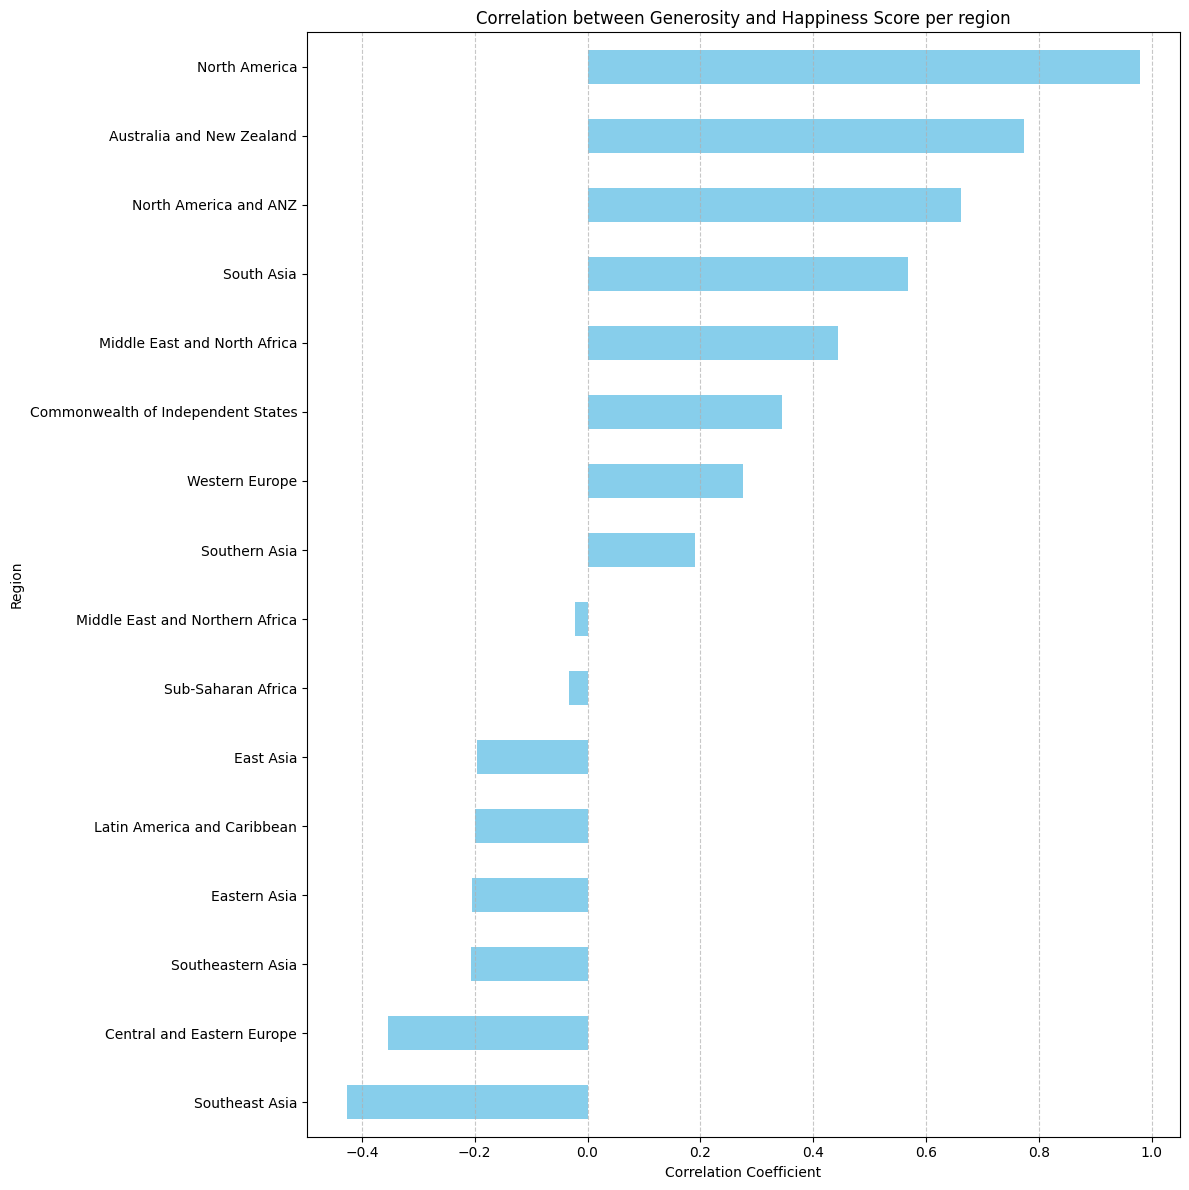

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
gen_happy_corr.sort_values().plot(kind='barh',color='skyblue')
plt.title('Correlation between Generosity and Happiness Score per region')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Region')
plt.grid(True,axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
df_all.columns

Index(['country', 'year', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'life_expectancy', 'freedom', 'corruption',
       'generosity'],
      dtype='object')

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

df_model = df_all.dropna(subset=['happiness_score'])

features = ['country', 'year', 'region','gdp_per_capita','social_support', 'life_expectancy', 'freedom', 'corruption',
       'generosity']

X = df_model[features]

y = df_model['happiness_score']

#Preprocess categorical and numerical data
preprocessor = ColumnTransformer(transformers = [('cat',OneHotEncoder(drop='first'),['region','country'])],remainder='passthrough')

#Create the pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['region', 'country'])])),
                ('regressor', LinearRegression())])

In [74]:
encoded_features = model.named_steps['preprocessor'].get_feature_names_out()

all_features = list(encoded_features)

coefficients = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({'feature':all_features,'coefficient':coefficients})
coef_df = coef_df.sort_values(by='coefficient',ascending=False)

print(coef_df)

                       feature  coefficient
102      cat__country_Maldives     1.828564
123      cat__country_Pakistan     1.818723
79         cat__country_Israel     1.747207
116   cat__country_New Zealand     1.466349
19      cat__country_Australia     1.446855
..                         ...          ...
174         cat__country_Yemen    -1.310361
69          cat__country_Haiti    -1.456423
12   cat__region_Southern Asia    -1.664430
154         cat__country_Syria    -1.800977
9       cat__region_South Asia    -2.475761

[184 rows x 2 columns]
